# Flight Fare Pridiction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_excel("a1_FlightFare_Dataset.xlsx")
pd.set_option('display.max_columns', None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Check Null Values

In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
#removing(droping) the rows null values
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.describe()

,Price
count,10000.000000
mean,9087.703100
std,4591.375402
min,1759.000000
25%,5276.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.Airline.value_counts()

Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

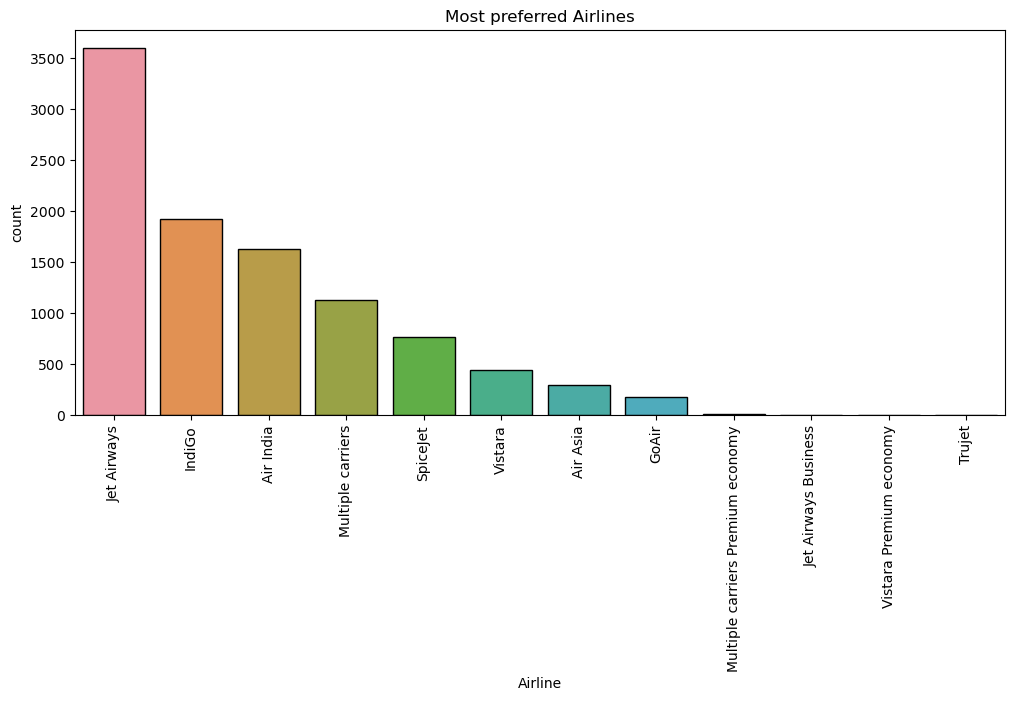

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=df ,order=df.Airline.value_counts().index , ec="black" )
plt.title("Most preferred Airlines")
plt.xticks(rotation= 90)
plt.show()

#### Jet Airways are the most preferred airways
#### Jet Airways have highest no. oh ticket sold followed by Indigo

In [9]:
day_df = df[['Airline','Date_of_Journey', 'Price']].copy()
day_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [10]:
day_df['Date_of_Journey'] = pd.to_datetime(day_df['Date_of_Journey'],format='%d/%m/%Y')
day_df['Weekday'] = day_df['Date_of_Journey'].dt.day_name()
day_df['Weekend'] = day_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
day_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


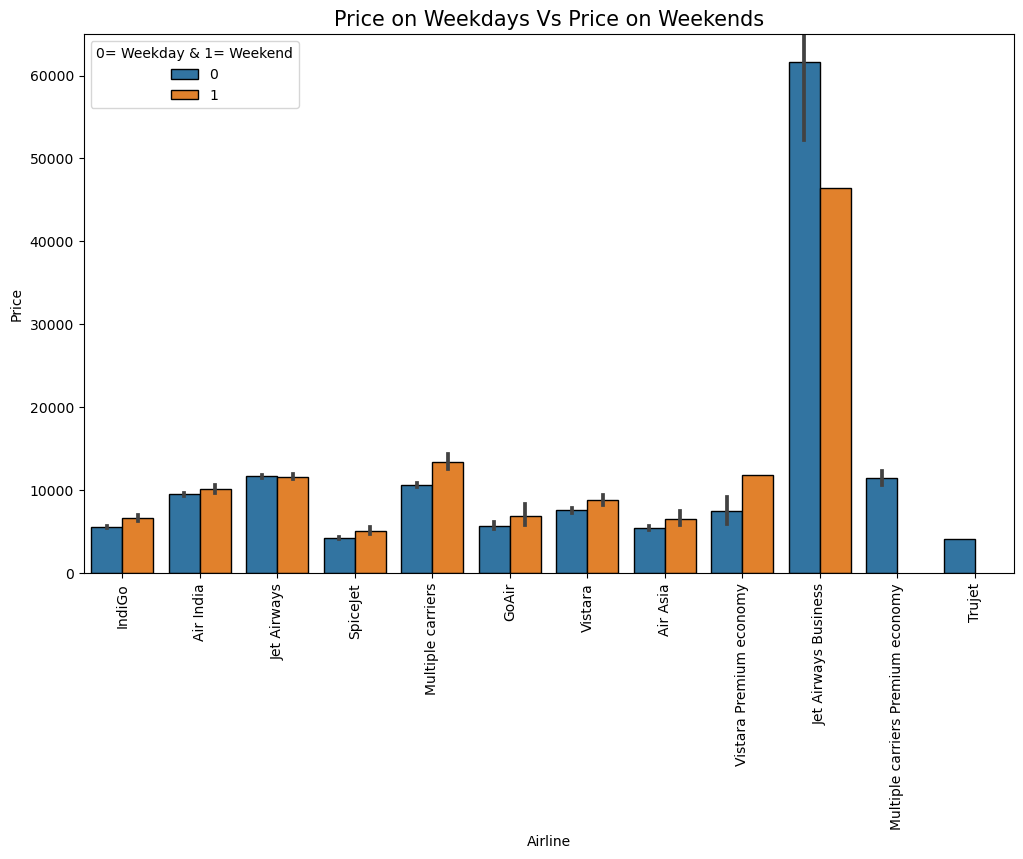

In [11]:
plt.subplots(figsize=(12,7))
sns.barplot(data=day_df,x='Airline',y='Price',hue='Weekend' , ec="black")
plt.xlabel("Airline")
plt.xticks(rotation = 90)
plt.ylabel("Price")
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='0= weekday & 1= weekend'.title())
plt.ylim(0,65000)
plt.show()

#### Prices on weekends are higher then weekdays

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
#convert object type data type to date type datatype
df["journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["journey_month"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month
#droping original Date_of_Journey coloumn
df.drop(["Date_of_Journey"], axis=1 ,inplace=True)
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
#convert object type data type to date type datatype
df["arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df["arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Dep_minute"] = pd.to_datetime(df.Dep_Time).dt.minute
df["Dep_hour"] = pd.to_datetime(df.Dep_Time).dt.hour
#dropping Arriva;_time and Dep_Time coloumn
df.drop(["Arrival_Time"] , axis=1 , inplace=True)
df.drop(["Dep_Time"] , axis=1 , inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,10,1,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,15,13,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,25,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,30,23,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,35,21,50,16


In [15]:
#droping Route And Additional info
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,10,1,20,22
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,15,13,50,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,25,4,25,9
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,30,23,5,18
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,35,21,50,16


In [16]:
# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(df["Duration"])

# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add duration_hours and duration_mins list to our dataset df
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
df.drop(["Duration"], axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,10,1,20,22,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,15,13,50,5,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,4,25,9,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,30,23,5,18,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,35,21,50,16,4,45


In [17]:
#converting duration in minutes only
df['total_minutes'] = (df['Duration_hours'] * 60) + df['Duration_mins']
#droping Duaration_minutes and Duration_hours
df.drop(["Duration_hours"], axis=1 , inplace=True)
df.drop(["Duration_mins"], axis=1 , inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,10,1,20,22,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,15,13,50,5,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,4,25,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,30,23,5,18,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,35,21,50,16,285


In [18]:
import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Jet Airways':1,'IndiGo':2,'Air India':3,'Multiple carriers':4,'SpiceJet':5,'Vistara':6,'Air Asia':7,'GoAir':8,'Multiple carriers Premium economy':9,
'Jet Airways Business':10,'Vistara Premium economy':11,'Trujet':12}

# Create a new column 'Size_Encoded' with custom label encoding
df['airline_Encoded'] = df['Airline'].map(custom_mapping)

df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,10,1,20,22,170,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,15,13,50,5,445,3
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,4,25,9,1140,1
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,30,23,5,18,325,2
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,35,21,50,16,285,2


### Airlines are label as
 Jet Airways =1
 IndiGo =2                    
 Air India =3                
 Multiple carriers =4          
 SpiceJet =5            
 Vistara =6      
 Air Asia =7  
 GoAir =8
 Multiple carriers Premium economy =9 
 Jet Airways Business =10 
 Vistara Premium economy =11 
 Trujet =12

In [19]:
df.Source.value_counts()

Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

In [20]:
import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Delhi':1,'Kolkata':2,'Banglore':3,'Mumbai':4,'Chennai':5}

# Create a new column 'Size_Encoded' with custom label encoding
df['Source_Encoded'] = df['Source'].map(custom_mapping)

df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded,Source_Encoded
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,10,1,20,22,170,2,3
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,15,13,50,5,445,3,2
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,4,25,9,1140,1,1
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,30,23,5,18,325,2,2
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,35,21,50,16,285,2,3


### Source are label as:
'Delhi':1,'Kolkata':2,'Banglore':3,'Mumbai':4,'Chennai':5

In [21]:
df.Destination.value_counts()

Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

### Destination are label as
'Cochin':6,'Banglore':7,'Delhi':8,'New Delhi':9,'Hyderabad':10,'Kolkata':11

In [22]:
import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Cochin':6,'Banglore':7,'Delhi':8,'New Delhi':9,'Hyderabad':10,'Kolkata':11}

# Create a new column 'Size_Encoded' with custom label encoding
df['Destination_Encoded'] = df['Destination'].map(custom_mapping)

df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,10,1,20,22,170,2,3,9
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,15,13,50,5,445,3,2,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,4,25,9,1140,1,1,6
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,30,23,5,18,325,2,2,7
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,35,21,50,16,285,2,3,9


In [23]:
df.drop(["Airline"], axis=1 , inplace=True)
df.drop(["Source"], axis=1 , inplace=True)
df.drop(["Destination"], axis=1 , inplace=True)
df.head()

,Total_Stops,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded,Source_Encoded,Destination_Encoded
0,non-stop,3897,24,3,10,1,20,22,170,2,3,9
1,2 stops,7662,1,5,15,13,50,5,445,3,2,7
2,2 stops,13882,9,6,25,4,25,9,1140,1,1,6
3,1 stop,6218,12,5,30,23,5,18,325,2,2,7
4,1 stop,13302,1,3,35,21,50,16,285,2,3,9


In [24]:
# Define the mapping of categories to integer values
ordinal_mapping = {'non-stop':0,'1 stop':1, '2 stops':2 , '3 stops':3 , '4 stops':4}

# Apply ordinal encoding using the map() function
df['Total_Stop'] = df['Total_Stops'].map(ordinal_mapping)
df.drop(["Total_Stops"], axis=1 , inplace=True)
df.head()

,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded,Source_Encoded,Destination_Encoded,Total_Stop
0,3897,24,3,10,1,20,22,170,2,3,9,0
1,7662,1,5,15,13,50,5,445,3,2,7,2
2,13882,9,6,25,4,25,9,1140,1,1,6,2
3,6218,12,5,30,23,5,18,325,2,2,7,1
4,13302,1,3,35,21,50,16,285,2,3,9,1


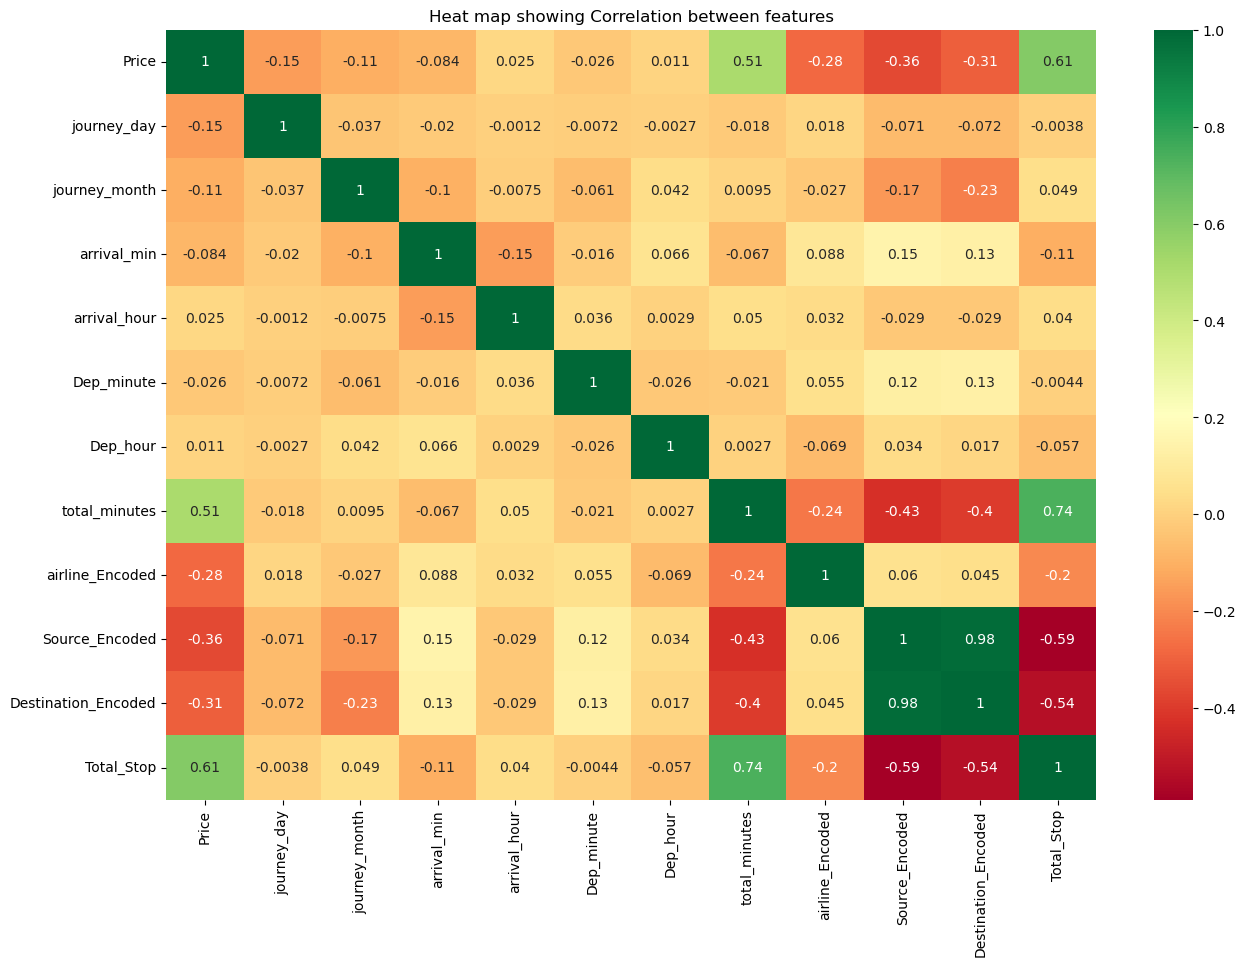

In [25]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

#### their is high correlation between
1. price & total_stop
2. price & total_minutes
3. total_stop & total_minutes

In [26]:
df.shape

(10000, 12)

In [27]:
df.columns

Index(['Price', 'journey_day', 'journey_month', 'arrival_min', 'arrival_hour',
       'Dep_minute', 'Dep_hour', 'total_minutes', 'airline_Encoded',
       'Source_Encoded', 'Destination_Encoded', 'Total_Stop'],
      dtype='object')

In [28]:
X = df.loc[:, ['journey_day', 'journey_month', 'arrival_min', 'arrival_hour',
   'Dep_minute', 'Dep_hour', 'total_minutes', 'airline_Encoded',
   'Source_Encoded', 'Destination_Encoded', 'Total_Stop']]
y = df.iloc[:, 0]
print(X.shape, y.shape)

(10000, 11) (10000,)


In [29]:
# Important feature using ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.14399065 0.06051589 0.02687965 0.03626619 0.02861915 0.03012344
 0.17165077 0.16317348 0.03447702 0.03241799 0.27188578]


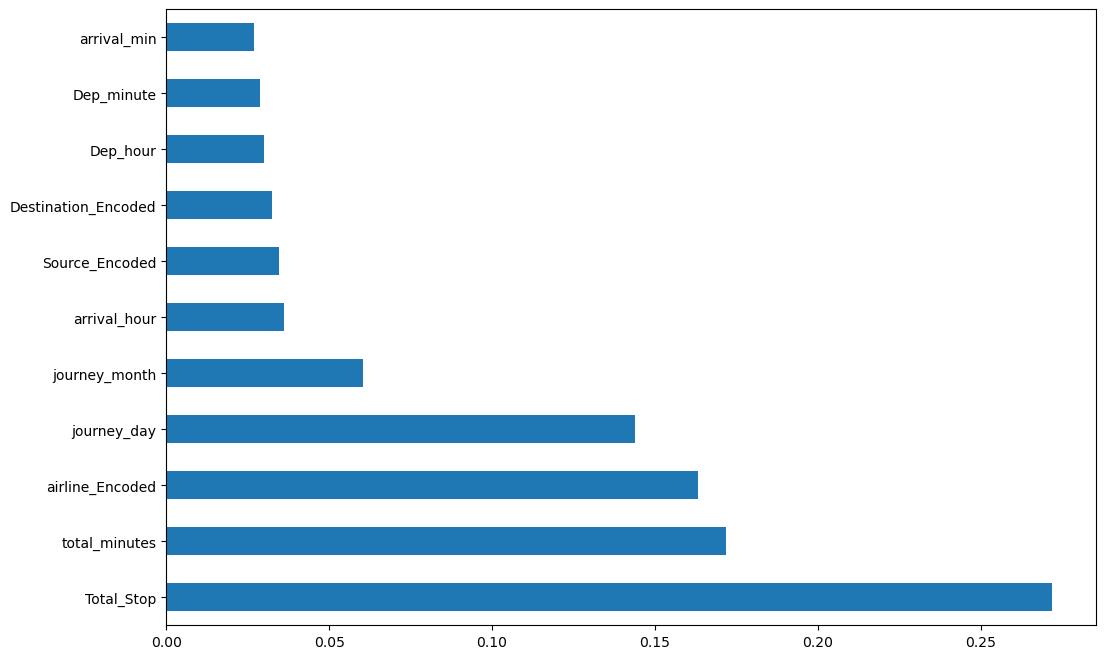

In [30]:
   # plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_ , index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [31]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [32]:
calc_vif(X)

,variables,VIF
0,journey_day,3.522793
1,journey_month,14.870983
2,arrival_min,3.380987
3,arrival_hour,4.859497
4,Dep_minute,2.778104
5,Dep_hour,5.730127
6,total_minutes,5.862858
7,airline_Encoded,3.408531
8,Source_Encoded,36.116033
9,Destination_Encoded,108.761031


In [33]:
X = df.loc[:, ['journey_day', 'journey_month',
   'Dep_minute', 'Dep_hour', 'total_minutes', 'airline_Encoded',
   'Source_Encoded', 'Destination_Encoded', 'Total_Stop']]

In [34]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 1. Using KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred=knr.predict(X_test)
r2=r2_score(y_test,y_pred)
print("r2 score :",r2)

print('MAE:',(mean_absolute_error(y_test,y_pred)))
print('MSE:',(mean_squared_error(y_test,y_pred)))
knr_accuracy=round(knr.score(X_test, y_test)*100,2)
print('Model Performance on Training Set:', round(knr.score(X_train, y_train)*100,2),"%")
print('Model Performance on Test Set:',knr_accuracy,"%")

r2 score : 0.5770833366616519
MAE: 1871.3808999999999
MSE: 8401643.40378
Model Performance on Training Set: 70.22 %
Model Performance on Test Set: 57.71 %


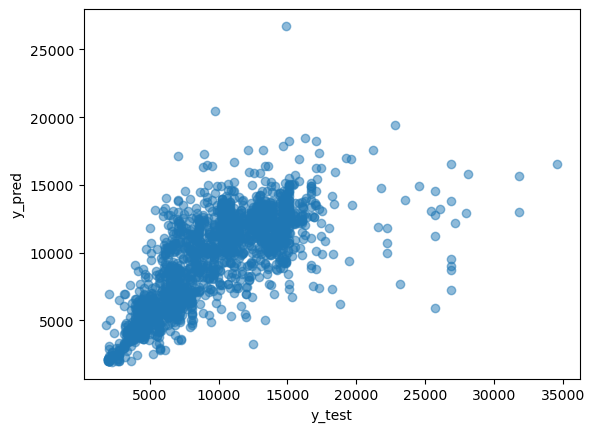

In [36]:
# Plot performance graph
y_pred =knr.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 2. Using DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr =  DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred=dtr.predict(X_test)
r2=r2_score(y_test,y_pred)
print("r2 score :",r2)

print('MAE:',(mean_absolute_error(y_test,y_pred)))
print('MSE:',(mean_squared_error(y_test,y_pred)))
dtr_accuracy=round(dtr.score(X_test, y_test)*100,2)
print('Model Performance on Training Set:', round(dtr.score(X_train, y_train)*100,2),"%")
print('Model Performance on Test Set:',dtr_accuracy,"%")

r2 score : 0.7481337909517822
MAE: 1336.5004166666668
MSE: 5003562.775657499
Model Performance on Training Set: 97.16 %
Model Performance on Test Set: 74.81 %


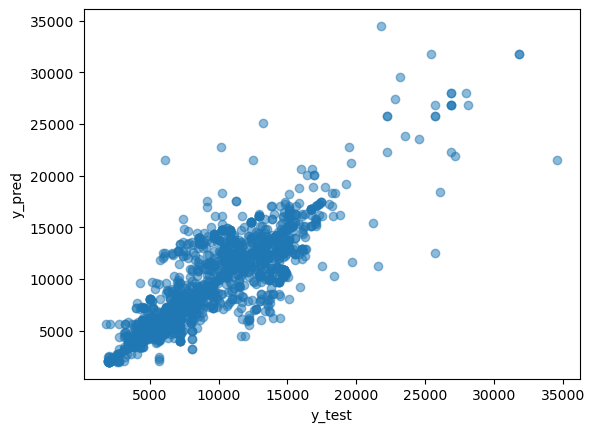

In [38]:
# Plot performance graph
y_pred =dtr.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### 3. Using RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)
r2=r2_score(y_test,y_pred)
print("r2 score :",r2)

print('MAE:',(mean_absolute_error(y_test,y_pred)))
print('MSE:',(mean_squared_error(y_test,y_pred)))
rfr_accuracy=round(rfr.score(X_test, y_test)*100,2)
print('Model Performance on Training Set:', round(rfr.score(X_train, y_train)*100,2),"%")
print('Model Performance on Test Set:',rfr_accuracy,"%")

r2 score : 0.8368617951457344
MAE: 1155.3855565813492
MSE: 3240896.236859315
Model Performance on Training Set: 95.26 %
Model Performance on Test Set: 83.69 %


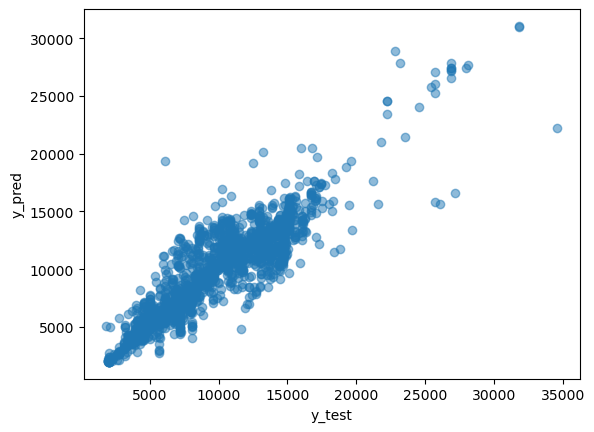

In [40]:
# Plot performance graph
y_pred =rfr.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:

#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [knr_accuracy,dtr_accuracy, rfr_accuracy]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,57.71
1,Decision Tree,74.81
2,Random Forest,83.69


### Random forest has the highest accuracy

## Hyperparameter tunning

In [42]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Harish\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [43]:
# best parameter
rf_model.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

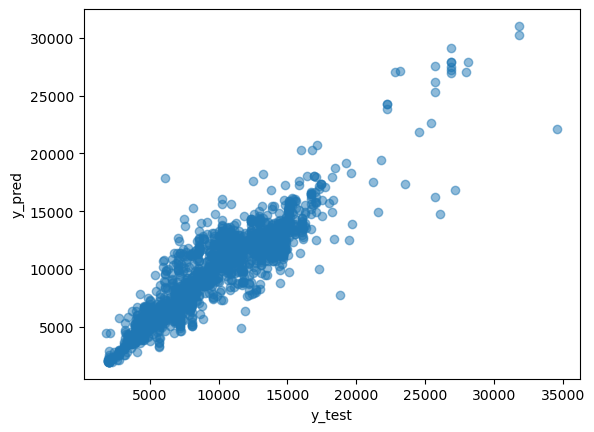

In [44]:
# Plot performance graph
y_pred =rf_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
#predicting the values
pred=rf_model.predict(X_test)
r2_score(y_test,pred)

0.8488912251506434

In [46]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8488912251506434
MAE: 1152.3657079717725
MSE: 3001920.1216734285
RMSE: 1732.6050102875233


### Accuracy Before Hyperparameter tunning = 84.71%
### Accuracy after Hyperparameter tunning = 86.45%
### MAE value before Hyperparameter tunning =1119.949402428391
### MAE value After Hyperparameter tunning = 1098.2981362640567

In [47]:
import pickle
# open a file, where you ant to store the data
file = open('c2_1_flight_rf.pkl', 'wb')
# dump information to that file
pickle.dump(rf_model, file)

## Check the Model performance on the unseen data

In [48]:
import pickle
path = 'c2_1_flight_rf.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

In [49]:
unseen_dataset = pd.read_excel("./a2_Unseen_Dataset.xlsx")
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149


In [50]:
unseen_dataset.Airline.value_counts()

Jet Airways             251
IndiGo                  126
Air India               118
Multiple carriers        67
SpiceJet                 49
Vistara                  32
Air Asia                 23
GoAir                    15
Jet Airways Business      1
Name: Airline, dtype: int64

In [51]:
unseen_dataset.Source.value_counts()

Delhi       279
Kolkata     193
Banglore    139
Mumbai       50
Chennai      21
Name: Source, dtype: int64

In [52]:
unseen_dataset.Destination.value_counts()

Cochin       279
Banglore     193
Delhi         74
New Delhi     65
Hyderabad     50
Kolkata       21
Name: Destination, dtype: int64

#### perform the same operation as we perform during the training

In [53]:
unseen_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [54]:
#convert object type data type to date type datatype
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.month
#droping original Date_of_Journey coloumn
unseen_dataset.drop(["Date_of_Journey"], axis=1 ,inplace=True)


#convert object type data type to date type datatype
unseen_dataset["arrival_min"] = pd.to_datetime(unseen_dataset.Arrival_Time).dt.minute
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset.Arrival_Time).dt.hour
unseen_dataset["Dep_minute"] = pd.to_datetime(unseen_dataset.Dep_Time).dt.minute
unseen_dataset["Dep_hour"] = pd.to_datetime(unseen_dataset.Dep_Time).dt.hour
#dropping Arriva;_time and Dep_Time coloumn
unseen_dataset.drop(["Arrival_Time"] , axis=1 , inplace=True)
unseen_dataset.drop(["Dep_Time"] , axis=1 , inplace=True)

#droping Route And Additional info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(unseen_dataset["Duration"])

# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add duration_hours and duration_mins list to our dataset df
unseen_dataset["Duration_hours"] = duration_hours
unseen_dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)



#converting duration in minutes only
unseen_dataset['total_minutes'] = (unseen_dataset['Duration_hours'] * 60) + unseen_dataset['Duration_mins']
#droping Duaration_minutes and Duration_hours
unseen_dataset.drop(["Duration_hours"], axis=1 , inplace=True)
unseen_dataset.drop(["Duration_mins"], axis=1 , inplace=True)


import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Jet Airways':1,'IndiGo':2,'Air India':3,'Multiple carriers':4,'SpiceJet':5,
                  'Vistara':6,'Air Asia':7,'GoAir':8,'Jet Airways Business':10}

# Create a new column 'Size_Encoded' with custom label encoding
unseen_dataset['airline_Encoded'] = unseen_dataset['Airline'].map(custom_mapping)

unseen_dataset.head()

import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Delhi':1,'Kolkata':2,'Banglore':3,'Mumbai':4,'Chennai':5}

# Create a new column 'Size_Encoded' with custom label encoding
unseen_dataset['Source_Encoded'] = unseen_dataset['Source'].map(custom_mapping)



import pandas as pd

# Define your custom mapping dictionary
custom_mapping = {'Cochin':6,'Banglore':7,'Delhi':8,'New Delhi':9,'Hyderabad':10,'Kolkata':11}

# Create a new column 'Size_Encoded' with custom label encoding
unseen_dataset['Destination_Encoded'] = unseen_dataset['Destination'].map(custom_mapping)



unseen_dataset.drop(["Airline"], axis=1 , inplace=True)
unseen_dataset.drop(["Source"], axis=1 , inplace=True)
unseen_dataset.drop(["Destination"], axis=1 , inplace=True)



# Define the mapping of categories to integer values
ordinal_mapping = {'non-stop':0,'1 stop':1, '2 stops':2 , '3 stops':3 , '4 stops':4}

# Apply ordinal encoding using the map() function
unseen_dataset['Total_Stop'] = unseen_dataset['Total_Stops'].map(ordinal_mapping)
unseen_dataset.drop(["Total_Stops"], axis=1 , inplace=True)

unseen_dataset.head()






,Price,journey_day,journey_month,arrival_min,arrival_hour,Dep_minute,Dep_hour,total_minutes,airline_Encoded,Source_Encoded,Destination_Encoded,Total_Stop
0,12898,27,5,0,19,5,7,715,1,1,6,1
1,10851,6,3,25,7,5,2,320,2,1,6,1
2,5704,21,3,0,23,45,9,795,3,1,6,1
3,11598,18,3,5,0,10,21,175,6,3,9,0
4,9149,27,5,15,19,30,8,645,4,1,6,1


In [55]:
X_unseen = unseen_dataset.loc[:, ['journey_day', 'journey_month',
   'Dep_minute', 'Dep_hour', 'total_minutes', 'airline_Encoded',
   'Source_Encoded', 'Destination_Encoded', 'Total_Stop']]
y_unseen = unseen_dataset.iloc[:, 0]

In [56]:
# Predictions on unseen data
y_pred = rf_model.predict(X_unseen)

In [57]:
print('r2_score:',r2_score(y_unseen,y_pred))
print('MAE:', mean_absolute_error(y_unseen, y_pred))
print('MSE:', mean_squared_error(y_unseen,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_unseen,y_pred)))

r2_score: 0.711425059059875
MAE: 1276.2664791496911
MSE: 6922410.691262951
RMSE: 2631.047451351448


### model is showing Accuracy of 72.96%

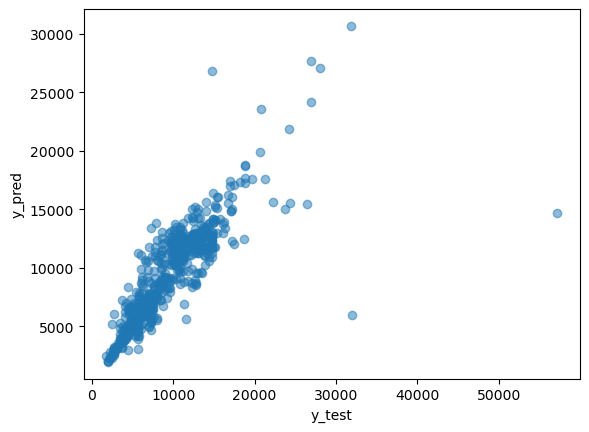

In [58]:
# Plot performance graph
y_pred =rf_model.predict(X_unseen)
plt.scatter(y_unseen, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [59]:
# writing model output file
df_y_pred = pd.DataFrame(y_pred,columns= ['Predicted Price'])
original_dataset = pd.read_excel("./a2_Unseen_Dataset.xlsx")
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
#dfx.to_excel("c2_ModelOutput.xlsx")
dfx.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898,14781.873150
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851,8628.348701
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704,6970.311837
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598,5634.500556
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149,9219.608338
5,Air India,15/06/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4148.099809
6,GoAir,21/05/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:35,9h,1 stop,No info,6195,6036.471949
7,IndiGo,9/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,21:00,9h 35m,1 stop,No info,6979,7501.590005
8,Air India,15/03/2019,Banglore,New Delhi,BLR → DEL,13:20,16:10,2h 50m,non-stop,No info,7276,6530.581792
9,SpiceJet,15/05/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No check-in baggage included,4760,5608.085540
